In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df_boolean = df.astype(bool)
df_boolean

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,True,True,True,True,True,True,False,True,True,False,True,False,False,False,True
1,True,True,True,True,True,False,True,False,False,True,False,False,False,True,False
2,True,True,True,True,True,False,False,True,False,False,True,False,False,False,False
3,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
4,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
5,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
6,True,True,True,True,True,False,False,False,True,False,False,True,False,False,False
7,True,True,True,True,True,False,True,False,False,True,False,False,False,False,False
8,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False
9,True,True,True,True,True,True,True,False,False,False,False,False,True,False,True


In [4]:
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]
for support in support_values:
    for confidence in confidence_values:
        frequent_itemsets = apriori(df_boolean, min_support=support, use_colnames=True)
        
        if frequent_itemsets.empty:
            print(f"\nSupport: {support}, Confidence: {confidence}")
            print("No frequent itemsets found.")
        else:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
            
            print(f"\nSupport: {support}, Confidence: {confidence}")
            print(f"Number of Rules: {len(rules)}")
            print(rules)


Support: 0.1, Confidence: 0.5
Number of Rules: 64906
           antecedents                                        consequents  \
0                 (V2)                                               (V1)   
1                 (V1)                                               (V2)   
2                 (V1)                                               (V3)   
3                 (V3)                                               (V1)   
4                 (V4)                                               (V1)   
...                ...                                                ...   
64901      (LOTR2, V3)  (Harry Potter1, LOTR1, V4, Green Mile, V5, V2,...   
64902  (Harry Potter1)  (LOTR1, V4, Green Mile, LOTR2, V5, V2, Sixth S...   
64903          (LOTR1)  (Harry Potter1, V4, Green Mile, LOTR2, V5, V2,...   
64904     (Green Mile)  (Harry Potter1, LOTR1, V4, LOTR2, V5, V2, Sixt...   
64905          (LOTR2)  (Harry Potter1, LOTR1, V4, Green Mile, V5, V2,...   

       antecedent sup

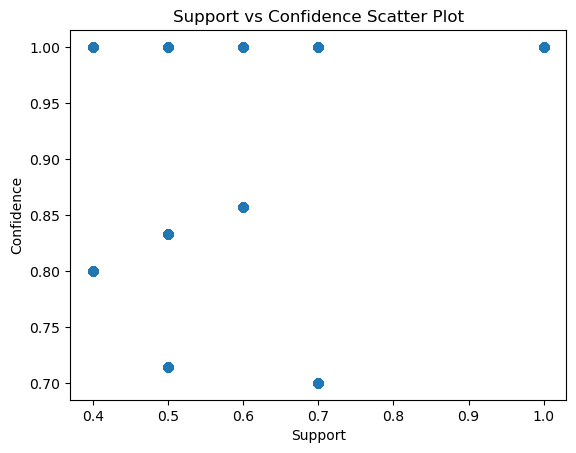

In [5]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence Scatter Plot')
plt.show()


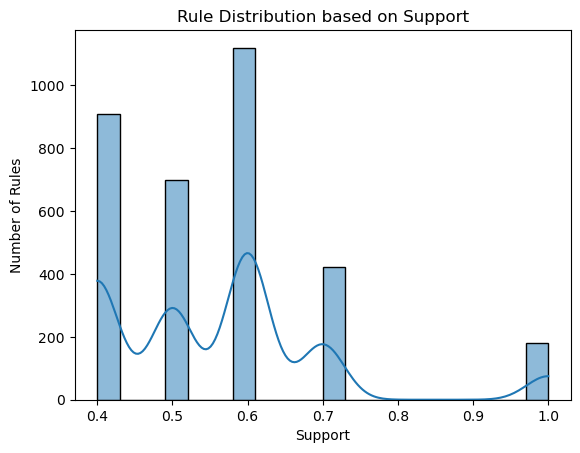

In [6]:
import seaborn as sns
sns.histplot(rules['support'], bins=20, kde=True)
plt.xlabel('Support')
plt.ylabel('Number of Rules')
plt.title('Rule Distribution based on Support')
plt.show()